# Evaluation Model Through Visualizations on Sample data

In [0]:
#Imports
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import sys
sys.path.insert(0,"drive/zahraa5")

from helpersv4 import * 
import pickle
import mynnet5 as nn

## Load data

In [4]:
data_path="drive/zahraa5/data/JanValid12_0.rec"
BATCH_SIZE=1
data_iter=nn.FileIter(data_path,batch_size=BATCH_SIZE,do_augment=True)
input_shapes = dict(data_iter.provide_data+data_iter.provide_label)
print(input_shapes)

{'data': (1, 1, 32, 32, 32), 'softmax_label': (1, 32768)}


/usr/local/lib/python3.6/dist-packages/mxnet/recordio.py:370: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  header = header._replace(label=np.fromstring(s, np.float32, header.flag))


## Load model

In [0]:
#load an mxnet model

model_epoch=350
model_path='drive/zahraa5/external_models/zApril28'
network, arg_params, aux_params = mx.model.load_checkpoint(model_path ,
                                                           model_epoch)
# Binding
exe = network.simple_bind(ctx=mx.gpu(0), **input_shapes)
exe.copy_params_from(arg_params, aux_params)
# get handle to input arrays
arg_arrays = dict(zip(network.list_arguments(), exe.arg_arrays))
data = arg_arrays[data_iter.provide_data[0][0]]
label = arg_arrays[data_iter.provide_label[0][0]]

## Make a prediction

In [20]:
#make a prediction

batch=data_iter.next()
data[:] = batch.data[0]     
label[:] = batch.label[0]

outputs = exe.forward(is_train=False)

p = outputs[0][0].asnumpy().reshape(32,32,32) 

/usr/local/lib/python3.6/dist-packages/mxnet/recordio.py:370: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  header = header._replace(label=np.fromstring(s, np.float32, header.flag))


In [21]:
p.min(),p.max()

(5.6245576e-06, 0.99999774)

In [22]:
np.histogram(p.flatten())

(array([32534,     2,     2,     1,     2,     1,     2,     3,     4,
          217]),
 array([5.62455762e-06, 1.00004836e-01, 2.00004047e-01, 3.00003258e-01,
        4.00002469e-01, 5.00001680e-01, 6.00000891e-01, 7.00000102e-01,
        7.99999313e-01, 8.99998524e-01, 9.99997735e-01]))

## Visualize

In [0]:
X = batch.data[0][0][0].asnumpy()
Y = batch.label[0][0].asnumpy().reshape((32,32,32))
                              
img = X
msk1 = Y
msk2 = p>.5#.001
msk2=msk2*1
msk1= np.ma.masked_where(msk1 == 0, msk1)
msk2= np.ma.masked_where(msk2 == 0, msk2)


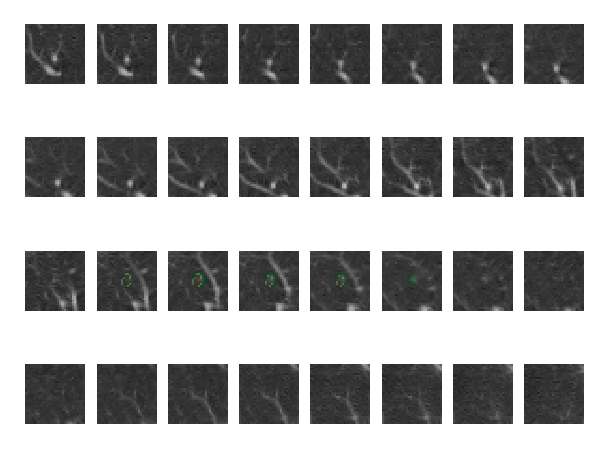

In [24]:
zs=32
num_rows=np.ceil(zs/8).astype(int)
f, plots = plt.subplots(num_rows, 8, sharex='col', sharey='row', figsize=(10, 8))
for i in range(zs):
    plots[i // 8, i % 8].axis('off')
    plots[i // 8, i % 8].imshow(img[i], cmap=plt.cm.gray,alpha=.9,vmin=0,vmax=1)
    plots[i // 8, i % 8].imshow(msk1[i],interpolation='none', cmap=plt.cm.Reds, alpha=.4, vmin=0, vmax=1)
    plots[i // 8, i % 8].imshow(msk2[i],interpolation='none', cmap=plt.cm.Greens, alpha=.4, vmin=0, vmax=1)

In [25]:
import matplotlib.animation as animation
from IPython.display import HTML

fig = plt.figure() # make figure
ax = plt.subplot(1,2,1)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_title('Label')
im=plt.imshow(img[0],cmap=plt.cm.gray,alpha=.9,vmin=0,vmax=1)
im1=plt.imshow(msk1[0],interpolation='none', cmap=plt.cm.Reds, alpha=.4, vmin=0, vmax=1)

ax = plt.subplot(1,2,2)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_title('Prediction')
im2=plt.imshow(img[0],cmap=plt.cm.gray,alpha=.9,vmin=0,vmax=1)
im3=plt.imshow(msk1[0],interpolation='none', cmap=plt.cm.Greens, alpha=.4, vmin=0, vmax=1)


# function to update figure
def updatefig(j):
    # set the data in the axesimage object
    im.set_array(img[j])
    im1.set_array(msk1[j])
    im2.set_array(img[j])
    im3.set_array(msk2[j])
    return im,im1,im2,im3
ani = animation.FuncAnimation(fig, updatefig, frames=range(len(img)),
                              interval=120)
#plt.show()
plt.close()
HTML(ani.to_html5_video())

In [0]:
if False:
  ani.save('drive/Chest_Cavity.gif', writer='imagemagick')

/usr/local/lib/python3.6/dist-packages/mxnet/recordio.py:370: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  header = header._replace(label=np.fromstring(s, np.float32, header.flag))


pred min: 2.7155376e-05 max: 0.9999552


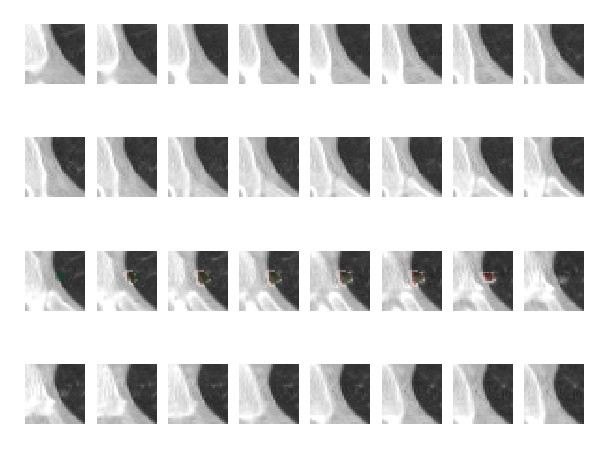

In [52]:
#make a prediction

batch=data_iter.next()
data[:] = batch.data[0]     
label[:] = batch.label[0]

outputs = exe.forward(is_train=False)

p = outputs[0][0].asnumpy().reshape(32,32,32) 

#Visualize
X = batch.data[0][0][0].asnumpy()
Y = batch.label[0][0].asnumpy().reshape((32,32,32))
                              
img = X
msk1 = Y
msk2 = p>.5
msk2=msk2*1
msk1= np.ma.masked_where(msk1 == 0, msk1)
msk2= np.ma.masked_where(msk2 == 0, msk2)
print("pred min: %s max: %s" % (p.min(), p.max()))

zs=32
num_rows=np.ceil(zs/8).astype(int)
f, plots = plt.subplots(num_rows, 8, sharex='col', sharey='row', figsize=(10, 8))
for i in range(zs):
    plots[i // 8, i % 8].axis('off')
    plots[i // 8, i % 8].imshow(img[i], cmap=plt.cm.gray,alpha=.9,vmin=0,vmax=1)
    plots[i // 8, i % 8].imshow(msk1[i],interpolation='none', cmap=plt.cm.Reds, alpha=.4, vmin=0, vmax=1)
    plots[i // 8, i % 8].imshow(msk2[i],interpolation='none', cmap=plt.cm.Greens, alpha=.4, vmin=0, vmax=1)
    
import matplotlib.animation as animation
from IPython.display import HTML

fig = plt.figure() # make figure
ax = plt.subplot(1,2,1)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_title('Label')
im=plt.imshow(img[0],cmap=plt.cm.gray,alpha=.9,vmin=0,vmax=1)
im1=plt.imshow(msk1[0],interpolation='none', cmap=plt.cm.Reds, alpha=.4, vmin=0, vmax=1)

ax = plt.subplot(1,2,2)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_title('Prediction')
im2=plt.imshow(img[0],cmap=plt.cm.gray,alpha=.9,vmin=0,vmax=1)
im3=plt.imshow(msk1[0],interpolation='none', cmap=plt.cm.Greens, alpha=.4, vmin=0, vmax=1)


# function to update figure
def updatefig(j):
    # set the data in the axesimage object
    im.set_array(img[j])
    im1.set_array(msk1[j])
    im2.set_array(img[j])
    im3.set_array(msk2[j])
    return im,im1,im2,im3
ani = animation.FuncAnimation(fig, updatefig, frames=range(len(img)),
                              interval=120)
#plt.show()
plt.close()
HTML(ani.to_html5_video())